In [1]:
# Import modules:
import pandas as pd
import numpy as np

In [2]:
# Import the data:
user_data = pd.read_csv("user_data.csv")

In [3]:
user_data

,city,education,age
0,"Brooklyn, NY",college,31
1,"Brooklyn, NY",graduate degree,31
2,"Brooklyn, NY",graduate degree,32
3,"Brooklyn, NY",college,37
4,"Brooklyn, NY",college,21
...,...,...,...
196,"Durham, NC",graduate degree,34
197,"Honolulu, HI",high school,35
198,"Corpus Christi, TX",high school,38
199,"Memphis, TN",high school,44


In [4]:
# Create age variable and find population mean:
population_mean = np.mean(user_data["age"])
population_mean

29.427860696517413

In [10]:
# Select increasingly larger samples: up to 10, 50, 100, 200
extra_small_sample = user_data["age"][:10]
small_sample = user_data["age"][:50]
medium_sample = user_data["age"][:100]
large_sample = user_data["age"][:200]

# Calculate the mean of those samples:
extra_small_sample_mean = np.mean(extra_small_sample)
small_sample_mean = np.mean(small_sample)
medium_sample_mean = np.mean(medium_sample)
large_sample_mean = np.mean(large_sample)

# Print them all out!
print ("Extra Small Sample Mean: " + str(extra_small_sample_mean))
print ("Small Sample Mean: " + str(small_sample_mean))
print ("Medium Sample Mean: " + str(medium_sample_mean))
print ("Large Sample Mean: " + str(large_sample_mean))


print ("\nPopulation Mean: "+ str(population_mean))

Extra Small Sample Mean: 29.0
Small Sample Mean: 29.24
Medium Sample Mean: 29.04
Large Sample Mean: 29.35

Population Mean: 29.427860696517413


In [11]:
# Import another dataset
pop_data = pd.read_csv("us_cities_small.csv")
pop_data.head()

,city,population_proper
0,"Prairie Ridge, WA",NaN
1,"Edison, WA",NaN
2,"Packwood, WA",NaN
3,"Wautauga Beach, WA",NaN
4,"Harper, WA",NaN


In [12]:
user_data.head()

,city,education,age
0,"Brooklyn, NY",college,31
1,"Brooklyn, NY",graduate degree,31
2,"Brooklyn, NY",graduate degree,32
3,"Brooklyn, NY",college,37
4,"Brooklyn, NY",college,21


In [14]:
# Merge the two datasets on the city column
new_df = pd.merge(user_data, pop_data, on = 'city', how = 'outer')
new_df.head()

,city,education,age,population_proper
0,"Brooklyn, NY",college,31.0,2629150.0
1,"Brooklyn, NY",graduate degree,31.0,2629150.0
2,"Brooklyn, NY",graduate degree,32.0,2629150.0
3,"Brooklyn, NY",college,37.0,2629150.0
4,"Brooklyn, NY",college,21.0,2629150.0


In [15]:
# Write a logic statement that determines if a location is 'rural' or "urban":
new_df.loc[new_df.population_proper < 100000, "location"] = "rural"
new_df.loc[new_df.population_proper >= 100000, "location"] = "urban"
new_df.head()

,city,education,age,population_proper,location
0,"Brooklyn, NY",college,31.0,2629150.0,urban
1,"Brooklyn, NY",graduate degree,31.0,2629150.0,urban
2,"Brooklyn, NY",graduate degree,32.0,2629150.0,urban
3,"Brooklyn, NY",college,37.0,2629150.0,urban
4,"Brooklyn, NY",college,21.0,2629150.0,urban


## Explore the data

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

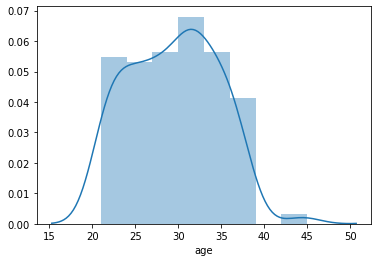

In [21]:
# Plot a histogram that shows the distribution of ages in the dataset:
age = new_df["age"]
sns.distplot(age)
plt.show()

In [22]:
# Find the mean age of urban and rural users:
location_mean_age = new_df.groupby('location').age.mean()
location_mean_age

location
rural    31.142857
urban    29.609195
Name: age, dtype: float64

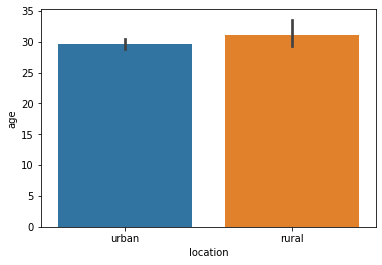

In [23]:
# Graph the age difference between rural and urban using a barplot:
sns.barplot(data=new_df, x='location', y='age')
plt.show()

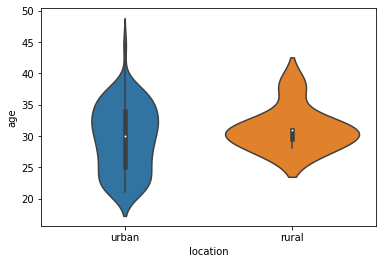

In [25]:
# Plot a violinplot, which shows the distribution of age in different locations:
sns.violinplot(data=new_df, x="location", y="age")
plt.show()

## Model the Data

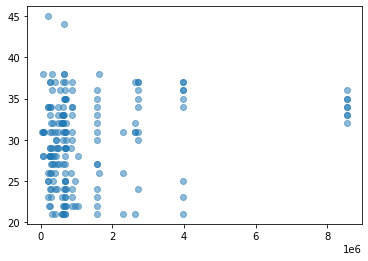

In [26]:
# Graph the population to age as a scatterplot:
x = new_df['population_proper']
y = new_df['age']
plt.scatter(x, y, alpha = 0.5)
plt.show()

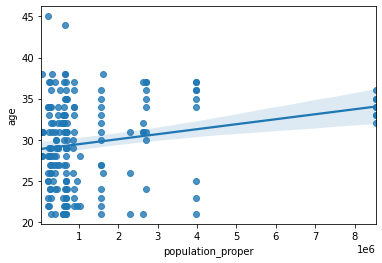

In [29]:
# Use seaborn to visualize a linear regression:
sns.regplot(data=new_df, x = "population_proper", y = "age")
plt.show()

/Users/ykajita/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


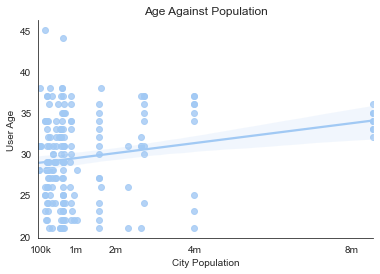

In [34]:
# Change the graph's visualization a bit
sns.regplot(data=new_df, x = "population_proper", y = "age")

# Change the axes
ax = plt.subplot(1, 1, 1)
ax.set_xticks([100000, 1000000, 2000000, 4000000, 8000000])
ax.set_xticklabels(['100k', '1m', '2m', '4m', '8m'])

# Change the figure style and palette:
sns.set_style('white')
sns.set_palette('pastel')
sns.despine()

# Title the axes and plot:
ax.set_xlabel("City Population")
ax.set_ylabel("User Age")
plt.title("Age Against Population")

plt.show()
